In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
corr = df.corrwith(df["Outcome"]).abs().drop("Outcome").sort_values(ascending=False)
newcorr = [j for i, j in enumerate(corr.items())]
X = pd.DataFrame(df[i[0]] for i in newcorr[:2]).T
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

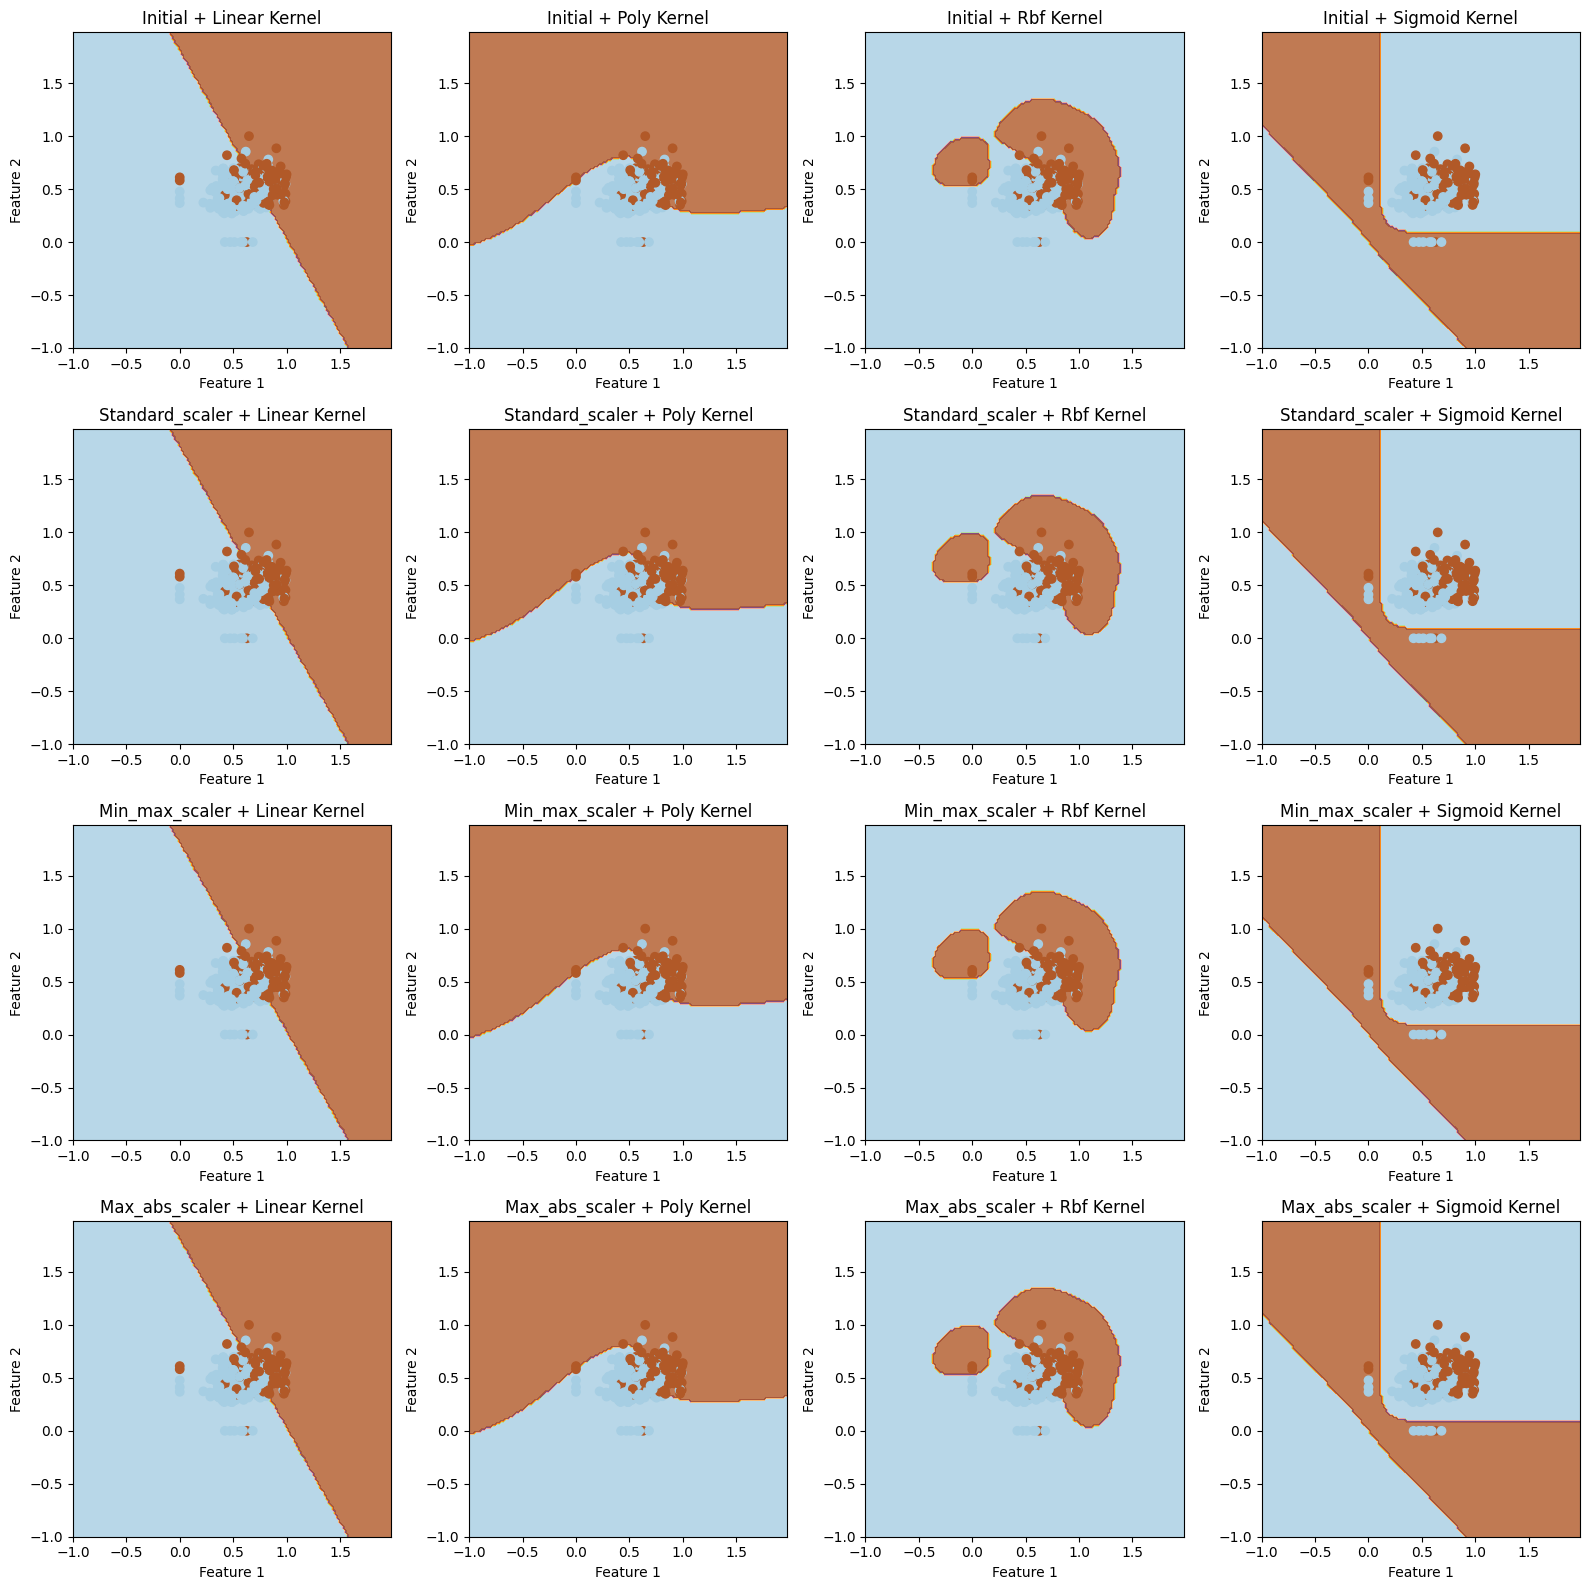

Accuracy Table:
          initial standard_scaler min_max_scaler max_abs_scaler
linear   0.772727        0.772727        0.75974        0.75974
poly     0.766234        0.701299        0.75974        0.75974
rbf       0.75974        0.766234        0.75974        0.75974
sigmoid   0.37013        0.688312        0.62987        0.62987


In [5]:
scalers = {
    'initial': None,
    'standard_scaler': StandardScaler(),
    'min_max_scaler': MinMaxScaler(),
    'max_abs_scaler': MaxAbsScaler()
}

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

accuracy_table = pd.DataFrame(columns=scalers.keys(), index=kernels)

for scaler_name, scaler in scalers.items():
    for kernel in kernels:
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        svm = SVC(kernel=kernel)
        svm.fit(X_train_scaled, y_train)

        y_pred = svm.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_table.loc[kernel, scaler_name] = accuracy

plt.figure(figsize=(16, 16))
plot_number = 1

for scaler_name, scaler in scalers.items():
    for kernel in kernels:
        plt.subplot(4, 4, plot_number)

        svm = SVC(kernel=kernel)
        svm.fit(X_train_scaled, y_train)

        h = 0.02
        x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
        y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'{scaler_name.capitalize()} + {kernel.capitalize()} Kernel')

        plot_number += 1
        
plt.tight_layout()
plt.show()

print("Accuracy Table:")
print(accuracy_table)